In [1]:
import sys, os
import matplotlib.pyplot as plt
sys.path.append('../')
from sklearn.metrics import mean_squared_error
import re
import numpy as np

In [2]:
%matplotlib inline

In [3]:
regex= re.compile(r'\d+')

In [4]:
saved_models = '/storage/yw18581/src/leaf_reco/saved_models/trained_6positions/'

In [6]:
model_names = os.listdir(saved_models)

In [7]:
model_names

['Trained_rUNet_pytorch_6positions_dataset_5epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_20epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_25epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_30epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_35epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_40epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_45epochs_0.75coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_50epochs_0.75coeff_mask.pkl',
 'history_Trained_rUNet_pytorch_50epochs_0.75coef.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_5epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_10epochs_0.7coeff_mask.pkl',
 'Trained_rUNet_pytorch_6positions_dataset_15epochs_0.7coeff_mask.pkl',


In [8]:
for fname in model_names:
        if fname.startswith("predicted_unseen"):
            #print(fname)
            if regex.findall(fname.split("_")[4])[1]==str(75):
                print(fname)

predicted_unseen_6positions_5epochs_0.75coeff.npz
predicted_unseen_6positions_10epochs_0.75coeff.npz
predicted_unseen_6positions_15epochs_0.75coeff.npz
predicted_unseen_6positions_20epochs_0.75coeff.npz
predicted_unseen_6positions_25epochs_0.75coeff.npz
predicted_unseen_6positions_30epochs_0.75coeff.npz
predicted_unseen_6positions_35epochs_0.75coeff.npz
predicted_unseen_6positions_40epochs_0.75coeff.npz
predicted_unseen_6positions_45epochs_0.75coeff.npz
predicted_unseen_6positions_50epochs_0.75coeff.npz


In [195]:
def get_fnames(coeff,key):
    f_list = []
    epochs = []
    for fname in model_names:
        if fname.startswith('_'.join(["predicted",key])):
            if regex.findall(fname.split("_")[4])[1]==str(coeff):
                epoch = int(regex.findall(fname.split("_")[3])[0]) 
                epochs.append(epoch)
                if int(regex.findall(fname.split("_")[3])[0])==epoch:
                    f_list.append(fname)
    
    return np.array(f_list)[np.argsort(epochs)], np.sort(epochs)

In [196]:
f_list_075, epochs = get_fnames(75, 'unseen')

In [197]:
def mse_vs_epochs(coeff, key):
    mse = []
    epchs = []
    f_list, epochs = get_fnames(coeff, key)
    for fname, e in zip(f_list, epochs):
        print(fname, e)
        data = np.load(os.path.join(saved_models, fname))
        y_true, y_pred = data['true'], data['pred']
        error = mean_squared_error(y_true, y_pred)
        
        epchs.append(e)
        mse.append(error)
    plt.plot(epchs, mse)
    return mse, epchs

predicted_unseen_6positions_5epochs_0.75coeff.npz 5
predicted_unseen_6positions_10epochs_0.75coeff.npz 10
predicted_unseen_6positions_15epochs_0.75coeff.npz 15
predicted_unseen_6positions_20epochs_0.75coeff.npz 20
predicted_unseen_6positions_25epochs_0.75coeff.npz 25
predicted_unseen_6positions_30epochs_0.75coeff.npz 30
predicted_unseen_6positions_35epochs_0.75coeff.npz 35
predicted_unseen_6positions_40epochs_0.75coeff.npz 40
predicted_unseen_6positions_45epochs_0.75coeff.npz 45
predicted_unseen_6positions_50epochs_0.75coeff.npz 50


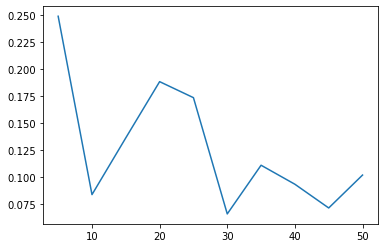

In [204]:
mse_075, epchs = mse_vs_epochs(75, 'unseen')

predicted_unseen_6positions_5epochs_0.7coeff.npz 5
predicted_unseen_6positions_10epochs_0.7coeff.npz 10
predicted_unseen_6positions_15epochs_0.7coeff.npz 15
predicted_unseen_6positions_20epochs_0.7coeff.npz 20
predicted_unseen_6positions_25epochs_0.7coeff.npz 25
predicted_unseen_6positions_30epochs_0.7coeff.npz 30
predicted_unseen_6positions_35epochs_0.7coeff.npz 35
predicted_unseen_6positions_40epochs_0.7coeff.npz 40
predicted_unseen_6positions_45epochs_0.7coeff.npz 45
predicted_unseen_6positions_50epochs_0.7coeff.npz 50


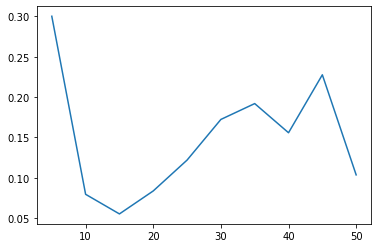

In [199]:
mse_070, epochs = mse_vs_epochs(7,'unseen')

predicted_unseen_6positions_5epochs_0.6coeff.npz 5
predicted_unseen_6positions_10epochs_0.6coeff.npz 10
predicted_unseen_6positions_15epochs_0.6coeff.npz 15
predicted_unseen_6positions_20epochs_0.6coeff.npz 20
predicted_unseen_6positions_25epochs_0.6coeff.npz 25
predicted_unseen_6positions_30epochs_0.6coeff.npz 30
predicted_unseen_6positions_35epochs_0.6coeff.npz 35
predicted_unseen_6positions_40epochs_0.6coeff.npz 40
predicted_unseen_6positions_45epochs_0.6coeff.npz 45
predicted_unseen_6positions_50epochs_0.6coeff.npz 50


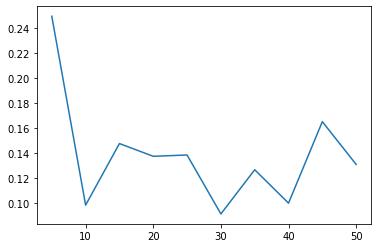

In [200]:
mse_060, epochs = mse_vs_epochs(6,'unseen')

predicted_unseen_6positions_5epochs_0.5coeff.npz 5
predicted_unseen_6positions_10epochs_0.5coeff.npz 10
predicted_unseen_6positions_15epochs_0.5coeff.npz 15
predicted_unseen_6positions_20epochs_0.5coeff.npz 20
predicted_unseen_6positions_25epochs_0.5coeff.npz 25
predicted_unseen_6positions_30epochs_0.5coeff.npz 30
predicted_unseen_6positions_35epochs_0.5coeff.npz 35
predicted_unseen_6positions_40epochs_0.5coeff.npz 40
predicted_unseen_6positions_45epochs_0.5coeff.npz 45
predicted_unseen_6positions_50epochs_0.5coeff.npz 50


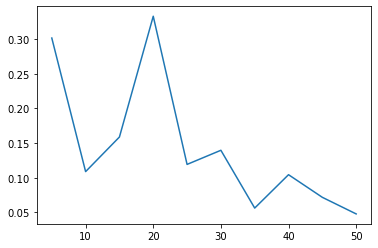

In [201]:
mse_050, epochs = mse_vs_epochs(5,'unseen')

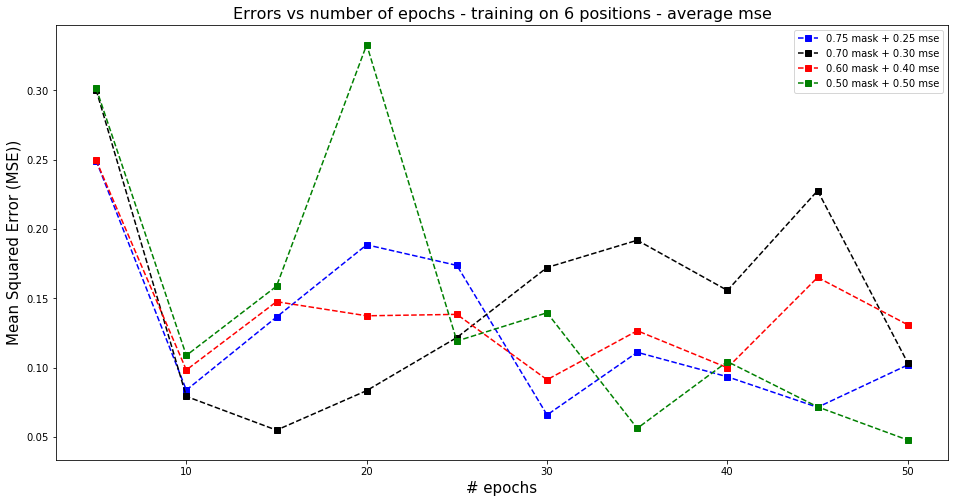

In [202]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse",size=16)
ax1.plot(epochs, mse_075, 's--', linewidth=1.5, c='blue',label='0.75 mask + 0.25 mse')
ax1.plot(epochs, mse_070,'s--', linewidth=1.5, c='k', label='0.70 mask + 0.30 mse')
ax1.plot(epochs, mse_060, 's--', linewidth=1.5, c='red', label='0.60 mask + 0.40 mse')
ax1.plot(epochs, mse_050, 's--', linewidth=1.5, c='green', label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

predicted_testdata_6positions_5epochs_0.75coeff.npz 5
predicted_testdata_6positions_10epochs_0.75coeff.npz 10
predicted_testdata_6positions_15epochs_0.75coeff.npz 15
predicted_testdata_6positions_20epochs_0.75coeff.npz 20
predicted_testdata_6positions_25epochs_0.75coeff.npz 25
predicted_testdata_6positions_30epochs_0.75coeff.npz 30
predicted_testdata_6positions_35epochs_0.75coeff.npz 35
predicted_testdata_6positions_40epochs_0.75coeff.npz 40
predicted_testdata_6positions_45epochs_0.75coeff.npz 45
predicted_testdata_6positions_50epochs_0.75coeff.npz 50


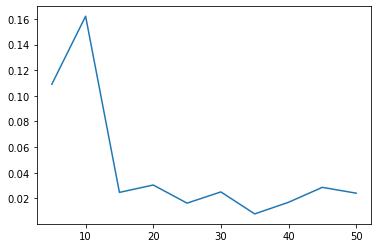

In [208]:
mse_075_test, epochs = mse_vs_epochs(75, 'testdata')

predicted_testdata_6positions_5epochs_0.7coeff.npz 5
predicted_testdata_6positions_10epochs_0.7coeff.npz 10
predicted_testdata_6positions_15epochs_0.7coeff.npz 15
predicted_testdata_6positions_20epochs_0.7coeff.npz 20
predicted_testdata_6positions_25epochs_0.7coeff.npz 25
predicted_testdata_6positions_30epochs_0.7coeff.npz 30
predicted_testdata_6positions_35epochs_0.7coeff.npz 35
predicted_testdata_6positions_40epochs_0.7coeff.npz 40
predicted_testdata_6positions_45epochs_0.7coeff.npz 45
predicted_testdata_6positions_50epochs_0.7coeff.npz 50


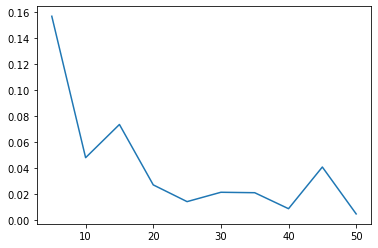

In [209]:
mse_070_test, epochs = mse_vs_epochs(7, 'testdata')

predicted_testdata_6positions_5epochs_0.6coeff.npz 5
predicted_testdata_6positions_10epochs_0.6coeff.npz 10
predicted_testdata_6positions_15epochs_0.6coeff.npz 15
predicted_testdata_6positions_20epochs_0.6coeff.npz 20
predicted_testdata_6positions_25epochs_0.6coeff.npz 25
predicted_testdata_6positions_30epochs_0.6coeff.npz 30
predicted_testdata_6positions_35epochs_0.6coeff.npz 35
predicted_testdata_6positions_40epochs_0.6coeff.npz 40
predicted_testdata_6positions_45epochs_0.6coeff.npz 45
predicted_testdata_6positions_50epochs_0.6coeff.npz 50


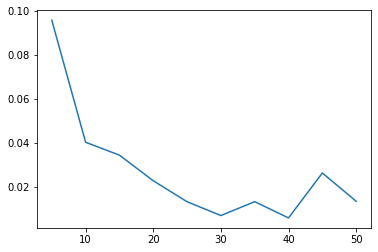

In [210]:
mse_060_test, epochs = mse_vs_epochs(6, 'testdata')

predicted_testdata_6positions_5epochs_0.5coeff.npz 5
predicted_testdata_6positions_10epochs_0.5coeff.npz 10
predicted_testdata_6positions_15epochs_0.5coeff.npz 15
predicted_testdata_6positions_20epochs_0.5coeff.npz 20
predicted_testdata_6positions_25epochs_0.5coeff.npz 25
predicted_testdata_6positions_30epochs_0.5coeff.npz 30
predicted_testdata_6positions_35epochs_0.5coeff.npz 35
predicted_testdata_6positions_40epochs_0.5coeff.npz 40
predicted_testdata_6positions_45epochs_0.5coeff.npz 45
predicted_testdata_6positions_50epochs_0.5coeff.npz 50


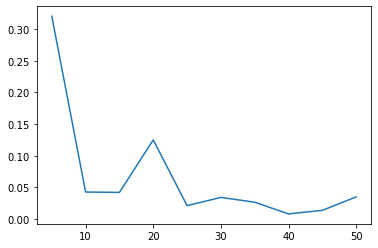

In [220]:
mse_050_test, epochs = mse_vs_epochs(5, 'testdata')

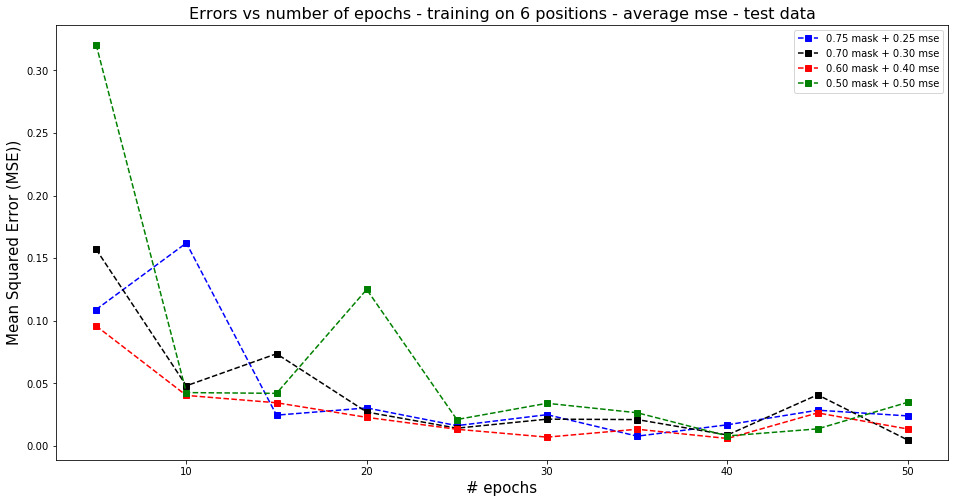

In [222]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse - test data",size=16)
ax1.plot(epochs, mse_075_test, 's--', linewidth=1.5, c='blue',label='0.75 mask + 0.25 mse')
ax1.plot(epochs, mse_070_test,'s--', linewidth=1.5, c='k', label='0.70 mask + 0.30 mse')
ax1.plot(epochs, mse_060_test, 's--', linewidth=1.5, c='red', label='0.60 mask + 0.40 mse')
ax1.plot(epochs, mse_050_test, 's--', linewidth=1.5, c='green', label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()

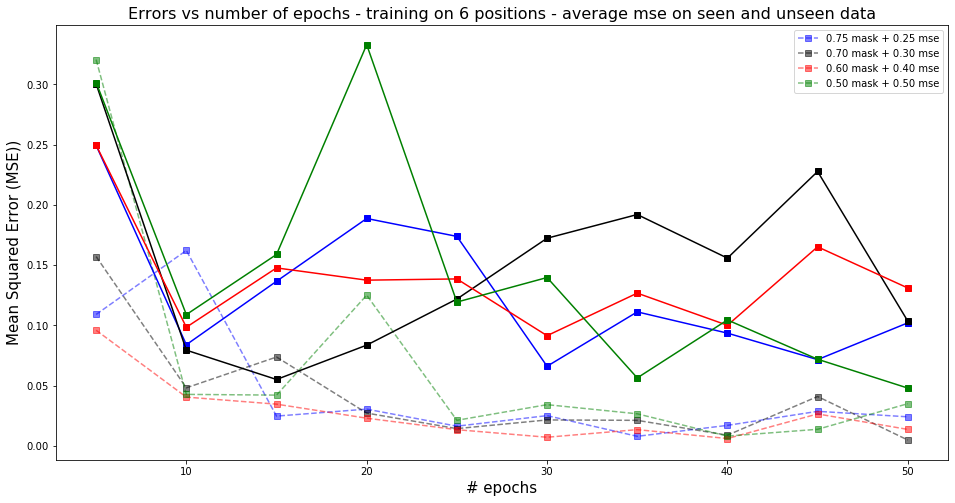

In [226]:
fig1, ax1 = plt.subplots(figsize=(16,8))
plt.title("Errors vs number of epochs - training on 6 positions - average mse on seen and unseen data",size=16)
ax1.plot(epochs, mse_075_test, 's--', linewidth=1.5, c='blue',label='0.75 mask + 0.25 mse', alpha=0.5)
ax1.plot(epochs, mse_070_test,'s--', linewidth=1.5, c='k', label='0.70 mask + 0.30 mse', alpha=0.5)
ax1.plot(epochs, mse_060_test, 's--', linewidth=1.5, c='red', label='0.60 mask + 0.40 mse', alpha=0.5)
ax1.plot(epochs, mse_050_test, 's--', linewidth=1.5, c='green', label='0.50 mask + 0.50 mse', alpha=0.5)

ax1.plot(epochs, mse_075, 's-', linewidth=1.5, c='blue')#,label='0.75 mask + 0.25 mse')
ax1.plot(epochs, mse_070,'s-', linewidth=1.5, c='k')#, label='0.70 mask + 0.30 mse')
ax1.plot(epochs, mse_060, 's-', linewidth=1.5, c='red')#, label='0.60 mask + 0.40 mse')
ax1.plot(epochs, mse_050, 's-', linewidth=1.5, c='green')#, label='0.50 mask + 0.50 mse')
#ax1.plot(epochs, errors_250_4, 's--', linewidth=1.5, c='magenta', label='250 epochs_unseen')
#ax1.plot(epochs, errors_300_4, 's--', linewidth=1.5, c='orange', label='300 epochs_unseen')

ax1.set_ylabel("Mean Squared Error (MSE))", size=15)
#ax1.set_xticks(np.arange(1,36,1))#[1,2,3,4,10,15,20,25,30,35])
ax1.set_xlabel("# epochs", size=15)
#plt.ylim(0., 1)
#ax1.set_yscale('log')
ax1.legend(loc='upper right')
plt.show()